<img src="http://millionsongdataset.com/sites/default/files/millionsong2-128.jpg">

# <center> GROUP PROJECT: Million Song Dataset Analysis

### <center>FROM ACQUISITION TO SUMMARIZATION/VISUALIZATION: THE LIFE-CYCLE OF A REASONABLY LARGE DATASET
    
<center>Contributors: Murat Turkoglu, Onur Temur, Abdurrahman Kocukcu

### Project
In this group project we have used and analyzed Million Song Dataset (MSD).

### Dataset Resource:
- http://millionsongdataset.com/


Principally, the dataset consists of almost all the information available through The Echo Nest API for one million popular tracks. This encompasses both metadata and audio analysis features. Each file is for one track which corresponds to one song, one release and one artist. All the information about these four items (track, song, release, artist) are in every file (which involves some redundancy, although the bulk of the data, relating to the audio analysis, is unique).

### Statistics of the dataset
- 1,000,000 songs / files
- 273 GB of data
- 44,745 unique artists
- 7,643 unique terms (The Echo Nest tags)
- 2,321 unique musicbrainz tags
- 43,943 artists with at least one term
- 2,201,916 asymmetric similarity relationships
- 515,576 dated tracks starting from 1922
- 18,196 cover songs identified

### Important Note:
There are couple of versions and subsets of the original data. 

Such as 

- MILLION SONG SUBSET (http://millionsongdataset.com/pages/getting-dataset/#subset)

or

- original h5 files (http://millionsongdataset.com/pages/example-track-description/)
http://millionsongdataset.com/sites/default/files/AdditionalFiles/TRAXLZU12903D05F94.h5



However in this project we have used all (post-created) txt files and sqllite db files. Which is available under http://millionsongdataset.com/sites/default/files/AdditionalFiles/ folder.


We think, files under this folder is ideal for this kind of master project.


But also we have prepared a repo on how to use and process subset data (h5 files).
https://github.com/muratturkoglu78/MillionSongDataset

### Entity Relationship Diagram

<img src="https://raw.githubusercontent.com/akocukcu/bda_group_project/master/bda_group_project.png">

### Collecting Data

In [7]:
# Before collecting the data files, let's create our file directory:
!mkdir data_files

In [ ]:
# collect: artist_location
!curl --user-agent "Chrome/81.0.4044.138" -o ./data_files/artist_location.txt http://millionsongdataset.com/sites/default/files/AdditionalFiles/artist_location.txt

In [ ]:
# collect: artist_similarity
!curl --user-agent "Chrome/81.0.4044.138" -o ./data_files/artist_similarity.db http://www.ee.columbia.edu/~thierry/artist_similarity.db

In [ ]:
# collect: track_metadata
!curl --user-agent "Chrome/81.0.4044.138" -o ./data_files/track_metadata.db http://millionsongdataset.com/sites/default/files/AdditionalFiles/track_metadata.db

In [ ]:
# collect: artist_term
!curl --user-agent "Chrome/81.0.4044.138" -o ./data_files/artist_term.db http://www.ee.columbia.edu/~thierry/artist_term.db

In [ ]:
# collect: msd_genre_dataset
!curl --user-agent "Chrome/81.0.4044.138" -o ./data_files/msd_genre_dataset.zip http://millionsongdataset.com/sites/default/files/AdditionalFiles/msd_genre_dataset.zip
!unzip msd_genre_dataset.zip

In [ ]:
# collect: unique_artists
!curl --user-agent "Chrome/81.0.4044.138" -o ./data_files/unique_artists.txt http://millionsongdataset.com/sites/default/files/AdditionalFiles/unique_artists.txt

### Cleaning-Transforming Data

In this dataset we don't need to apply any statistical cleaning (such as removing outliers or missing values).


So we will directly start transforming and importing data.

In [21]:
# For both txt and db files, we are going to convert stage data as csv files.
# Rest will be only importing (ready) csv files to postgresql database

In [ ]:
!pip install pandas==1.0.3

In [ ]:
!pip install matplotlib==3.2.1

In [7]:
# we are going to use pandas as our reader-writer for txt and csv files.
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# convert artist_location to csv
df = pd.read_csv("./data_files/artist_location.txt", sep='<SEP>',header=None)
df.to_csv('./data_files/artist_location_cleared.csv',index=False,header=False)

/Users/abdurrahmankocukcu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [ ]:
# check if line counts are same:
!wc -l ./data_files/artist_location.txt
!wc -l ./data_files/artist_location_cleared.csv

In [ ]:
# convert unique_artists to csv
df = pd.read_csv("./data_files/unique_artists.txt", sep='<SEP>',header=None)
df.to_csv('./data_files/unique_artists_cleared.csv',index=False,header=False)

In [ ]:
# check if line counts are same:
!wc -l ./data_files/unique_artists.txt
!wc -l ./data_files/unique_artists_cleared.csv

In [41]:
# convert msd_genre_dataset to csv
# This txt file starts with a description in first 10 rows. So we will skip them...
df = pd.read_csv("./data_files/msd_genre_dataset.txt", sep=',',header=None, skiprows=10)
df.to_csv('./data_files/msd_genre_dataset_cleared.csv',index=False,header=False)

In [ ]:
# check if line counts are same:
!wc -l ./data_files/msd_genre_dataset.txt
!wc -l ./data_files/msd_genre_dataset_cleared.csv

In [42]:
# we are going to use default sqlite3 module to connect sqlite databases and read its tables
import sqlite3

In [43]:
# Let's have a look at track_metadata db's tables:
conn = sqlite3.connect("./data_files/track_metadata.db")
sql_query = "SELECT name FROM sqlite_master WHERE type ='table' AND name NOT LIKE 'sqlite_%';"
pd.read_sql_query(sql=sql_query,con=conn)

,name
0,songs


In [ ]:
# There is only songs table. Count records:
sql_query = "SELECT count(*) from songs;"
pd.read_sql_query(sql=sql_query,con=conn)

In [47]:
# Let's export it as csv.
sql_query = "SELECT * from songs;"
df = pd.read_sql_query(sql=sql_query,con=conn)
df.to_csv('./data_files/track_metadata_cleared.csv',index=False,header=False)

In [ ]:
# check csv record counts
!wc -l ./data_files/track_metadata_cleared.csv

In [57]:
# Let's have a look at artist_similarity db's tables:
conn = sqlite3.connect("./data_files/artist_similarity.db")
sql_query = "SELECT name FROM sqlite_master WHERE type ='table' AND name NOT LIKE 'sqlite_%';"
pd.read_sql_query(sql=sql_query,con=conn)

,name
0,artists
1,similarity


In [ ]:
# We will only use similarity table. Count records
sql_query = "SELECT count(*) from similarity;"
pd.read_sql_query(sql=sql_query,con=conn)

In [58]:
# Let's export it as csv.
sql_query = "SELECT * from similarity;"
df = pd.read_sql_query(sql=sql_query,con=conn)
df.to_csv('./data_files/artist_similarity_cleared.csv',index=False,header=False)

In [ ]:
# check csv record counts
!wc -l ./data_files/artist_similarity_cleared.csv

In [60]:
# Let's have a look at artist_term db's tables:
conn = sqlite3.connect("./data_files/artist_term.db")
sql_query = "SELECT name FROM sqlite_master WHERE type ='table' AND name NOT LIKE 'sqlite_%';"
pd.read_sql_query(sql=sql_query,con=conn)

,name
0,artists
1,terms
2,artist_term
3,mbtags
4,artist_mbtag


In [ ]:
# we will use artist_term and artist_mbtag. Count records

In [ ]:
sql_query = "SELECT count(*) from artist_term;"
pd.read_sql_query(sql=sql_query,con=conn)

In [ ]:
sql_query = "SELECT count(*) from artist_mbtag;"
pd.read_sql_query(sql=sql_query,con=conn)

In [61]:
# Let's export them as csv.
sql_query = "SELECT * from artist_term;"
df = pd.read_sql_query(sql=sql_query,con=conn)
df.to_csv('./data_files/artist_term_cleared.csv',index=False,header=False)

sql_query = "SELECT * from artist_mbtag;"
df = pd.read_sql_query(sql=sql_query,con=conn)
df.to_csv('./data_files/artist_mbtag_cleared.csv',index=False,header=False)

In [74]:
# check csv record counts
!wc -l ./data_files/artist_term_cleared.csv
!wc -l ./data_files/artist_mbtag_cleared.csv

 1109381 ./data_files/artist_term_cleared.csv
   24777 ./data_files/artist_mbtag_cleared.csv


In [4]:
# Cleaning and staging data is finished. We can review our final csv files:
!ls -l ./data_files/*_cleared.csv

-rw-r--r--@ 1 abdurrahmankocukcu  staff     997589 May 19 16:14 ./data_files/artist_location_cleared.csv
-rw-r--r--@ 1 abdurrahmankocukcu  staff     720390 May 19 17:51 ./data_files/artist_mbtag_cleared.csv
-rw-r--r--@ 1 abdurrahmankocukcu  staff   83672808 May 19 17:49 ./data_files/artist_similarity_cleared.csv
-rw-r--r--@ 1 abdurrahmankocukcu  staff   31695306 May 19 17:51 ./data_files/artist_term_cleared.csv
-rw-r--r--@ 1 abdurrahmankocukcu  staff   28417031 May 19 16:36 ./data_files/msd_genre_dataset_cleared.csv
-rw-r--r--@ 1 abdurrahmankocukcu  staff  202062587 May 19 17:42 ./data_files/track_metadata_cleared.csv
-rw-r--r--@ 1 abdurrahmankocukcu  staff    3825680 May 19 16:27 ./data_files/unique_artists_cleared.csv


### Creating and Importing Data to Postgresql Tables 

In [77]:
# Until now we have not worked on postgresql. Let's connect and start.
!sudo service postgresql start
# note: if you encounter any error, (due to OS) then it is better to start postgres outside notebook

In [1]:
# List the existing databases:
!psql -U postgres -c "\l"

                                            List of databases
        Name         |       Owner        | Encoding |   Collate   |    Ctype    |   Access privileges   
---------------------+--------------------+----------+-------------+-------------+-----------------------
 abdurrahmankocukcu  | abdurrahmankocukcu | UTF8     | en_US.UTF-8 | en_US.UTF-8 | 
 millionsongdatabase | abdurrahmankocukcu | UTF8     | en_US.UTF-8 | en_US.UTF-8 | 
 msddatabase         | postgres           | UTF8     | en_US.UTF-8 | en_US.UTF-8 | 
 postgres            | postgres           | UTF8     | en_US.UTF-8 | en_US.UTF-8 | 
 sparkifydb          | abdurrahmankocukcu | UTF8     | en_US.UTF-8 | en_US.UTF-8 | 
 template0           | postgres           | UTF8     | en_US.UTF-8 | en_US.UTF-8 | =c/postgres          +
                     |                    |          |             |             | postgres=CTc/postgres
 template1           | postgres           | UTF8     | en_US.UTF-8 | en_US.UTF-8 | =c/postgres 

In [83]:
# enable the sql magic on python kernel:
!pip install ipython-sql==0.4.0

In [1]:
%load_ext sql

In [ ]:
!pip install psycopg2==2.8.5

In [92]:
%sql postgres://postgres@localhost/postgres

__Let's create our database__

In [93]:
%%sql
-- create a new database msddatabase
END;
CREATE DATABASE msddatabase;

   postgres://postgres@localhost/millionsongdatabase
 * postgres://postgres@localhost/postgres
Done.
Done.


[]

__Connect to our new database__

In [2]:
%sql postgres://postgres@localhost/msddatabase

__Create Tables__

In [96]:
%%sql
-- create artist_location table
create table artist_location
(
    artist_id text,
    artist_latitude double precision,
    artist_longitude double precision,
    artist_name text,
    artist_location text
);

   postgres://postgres@localhost/millionsongdatabase
 * postgres://postgres@localhost/msddatabase
   postgres://postgres@localhost/postgres
Done.


[]

In [99]:
%%sql
-- create artist_similarity table
create table artist_similarity
(
    target_artist_id text,
    similar_artist_id text
);

   postgres://postgres@localhost/millionsongdatabase
 * postgres://postgres@localhost/msddatabase
   postgres://postgres@localhost/postgres
Done.


[]

In [100]:
%%sql
-- create track_metadata table
create table track_metadata
(
    track_id text,
    title text,
    song_id text,
    release text,
    artist_id text,
    artist_mbid text,
    artist_name text,
    duration double precision,
    artist_familiarity double precision,
    artist_hotttnesss double precision,
    year integer,
    track_7digitalid integer,
    shs_perf integer,
    shs_work integer
);

   postgres://postgres@localhost/millionsongdatabase
 * postgres://postgres@localhost/msddatabase
   postgres://postgres@localhost/postgres
Done.


[]

In [101]:
%%sql
-- create artist_term table
create table artist_term
(
    artist_id text,
    term text
);

   postgres://postgres@localhost/millionsongdatabase
 * postgres://postgres@localhost/msddatabase
   postgres://postgres@localhost/postgres
Done.


[]

In [104]:
%%sql
-- create artist_mbtag table
create table artist_mbtag
(
    artist_id text,
    mbtag text
);

   postgres://postgres@localhost/millionsongdatabase
 * postgres://postgres@localhost/msddatabase
   postgres://postgres@localhost/postgres
Done.


[]

In [102]:
%%sql
-- create msd_genre_dataset table
create table msd_genre_dataset
(
    genre text,
    track_id text,
    artist_name text,
    title text,
    loudness double precision,
    tempo double precision,
    time_signature integer,
    key integer,
    mode integer,
    duration double precision,
    avg_timbre1 double precision,
    avg_timbre2 double precision,
    avg_timbre3 double precision,
    avg_timbre4 double precision,
    avg_timbre5 double precision,
    avg_timbre6 double precision,
    avg_timbre7 double precision,
    avg_timbre8 double precision,
    avg_timbre9 double precision,
    avg_timbre10 double precision,
    avg_timbre11 double precision,
    avg_timbre12 double precision,
    var_timbre1 double precision,
    var_timbre2 double precision,
    var_timbre3 double precision,
    var_timbre4 double precision,
    var_timbre5 double precision,
    var_timbre6 double precision,
    var_timbre7 double precision,
    var_timbre8 double precision,
    var_timbre9 double precision,
    var_timbre10 double precision,
    var_timbre11 double precision,
    var_timbre12 double precision
);

   postgres://postgres@localhost/millionsongdatabase
 * postgres://postgres@localhost/msddatabase
   postgres://postgres@localhost/postgres
Done.


[]

In [103]:
%%sql
-- create unique_artists table
create table unique_artists
(
    artist_id text,
    artist_mbid text,
    track_id text,
    artist_name text
);

   postgres://postgres@localhost/millionsongdatabase
 * postgres://postgres@localhost/msddatabase
   postgres://postgres@localhost/postgres
Done.


[]

__Import Data and Populate Tables__

In [98]:
!psql -U postgres -d msddatabase -c "\copy artist_location from ./data_files/artist_location_cleared.csv DELIMITER ',' CSV"

COPY 13850


In [106]:
!psql -U postgres -d msddatabase -c "\copy artist_similarity from ./data_files/artist_similarity_cleared.csv DELIMITER ',' CSV"

COPY 2201916


In [107]:
!psql -U postgres -d msddatabase -c "\copy track_metadata from ./data_files/track_metadata_cleared.csv DELIMITER ',' CSV"

COPY 1000000


In [108]:
!psql -U postgres -d msddatabase -c "\copy artist_term from ./data_files/artist_term_cleared.csv DELIMITER ',' CSV"

COPY 1109381


In [109]:
!psql -U postgres -d msddatabase -c "\copy artist_mbtag from ./data_files/artist_mbtag_cleared.csv DELIMITER ',' CSV"

COPY 24777


In [110]:
!psql -U postgres -d msddatabase -c "\copy msd_genre_dataset from ./data_files/msd_genre_dataset_cleared.csv DELIMITER ',' CSV"

COPY 59600


In [111]:
!psql -U postgres -d msddatabase -c "\copy unique_artists from ./data_files/unique_artists_cleared.csv DELIMITER ',' CSV"

COPY 44745


### From Staging to Data Warehouse
Until this point, we have created out staging tables. 
They do not have any constraints, primary keys or indexes because of fast bulk insert.

But now we want to apply some analytic queries. 
So we are going to create our analytics tables.

These are:
- Dimensional tables (dim_artists, dim_tracks, dim_artist_similarities)

__dim_artists table__

In [4]:
%%sql
-- create dim_artists table
create table dim_artists
(
    artist_id         text PRIMARY KEY,
    artist_mbid       text,
    artist_name       text,
    artist_latitude   double precision,
    artist_longitude  double precision,
    artist_location   text,
    mbtags            text,
    terms             text
);

 * postgres://postgres@localhost/msddatabase
Done.


[]

In [5]:
%%sql
-- insert into dim_artists table
INSERT INTO dim_artists
SELECT
       ua.artist_id,
       ua.artist_mbid,
       ua.artist_name,
       al.artist_latitude,
       al.artist_longitude,
       al.artist_location,
       am.mbtags,
       at.terms
FROM unique_artists ua
LEFT JOIN artist_location al on ua.artist_id = al.artist_id
LEFT JOIN (

    SELECT
    artist_id,
    string_agg(mbtag, ', ') AS mbtags
    FROM artist_mbtag
    GROUP BY artist_id

) am on al.artist_id = am.artist_id
LEFT JOIN (

    SELECT
    artist_id,
    string_agg(term, ', ') AS terms
    FROM artist_term
    GROUP BY artist_id

) at on al.artist_id = at.artist_id;

 * postgres://postgres@localhost/msddatabase
44745 rows affected.


[]

__dim_tracks table__

In [7]:
%%sql
-- create dim_tracks table
create table dim_tracks
(
    track_id             text PRIMARY KEY,
    song_id              text,
    artist_id            text REFERENCES dim_artists(artist_id),
    title                text,
    release              text,
    year                 integer,
    duration             double precision,
    artist_familiarity   double precision,
    artist_hotttnesss    double precision,
    track_7digitalid     integer,
    shs_perf             integer,
    shs_work             integer,
    genre                text,
    loudness             double precision,
    tempo                double precision
);

 * postgres://postgres@localhost/msddatabase
Done.


[]

In [13]:
%%sql
CREATE INDEX idx_tracks_song ON dim_tracks(song_id);

 * postgres://postgres@localhost/msddatabase
Done.


[]

In [8]:
%%sql
-- insert into dim_tracks table
INSERT INTO dim_tracks
SELECT
       tm.track_id,
       tm.song_id,
       tm.artist_id,
       tm.title,
       tm.release,
       tm.year,
       tm.duration,
       tm.artist_familiarity,
       tm.artist_hotttnesss,
       tm.track_7digitalid,
       tm.shs_perf,
       tm.shs_work,
       mgd.genre,
       mgd.loudness,
       mgd.tempo
FROM track_metadata tm
LEFT JOIN msd_genre_dataset mgd on tm.track_id = mgd.track_id;

 * postgres://postgres@localhost/msddatabase
1000000 rows affected.


[]

__dim_artist_similarities table__

In [9]:
%%sql
-- create dim_artist_similarities table
create table dim_artist_similarities
(
    target_artist_id  text REFERENCES dim_artists(artist_id),
    similar_artist_id text REFERENCES dim_artists(artist_id)
);

 * postgres://postgres@localhost/msddatabase
Done.


[]

In [12]:
%%sql
-- insert into dim_artist_similarities table
INSERT INTO dim_artist_similarities
SELECT
    target_artist_id,
    similar_artist_id
FROM artist_similarity;

 * postgres://postgres@localhost/msddatabase
2201916 rows affected.


[]

### Queries-Analysis-Visualization

As our first queries let's describe our tables:

__describe dim_artists table__

In [6]:
%%sql
-- describe dim_artists table
SELECT
count(*) as artist_count
,count(distinct artist_location) as artist_location_count
,SUM(CASE WHEN artist_location IS NULL THEN 1 ELSE 0 END) as null_artist_location_count
FROM dim_artists;

 * postgres://postgres@localhost/msddatabase
1 rows affected.


artist_count,artist_location_count,null_artist_location_count
44745,3989,30899


__describe dim_tracks table__

In [8]:
%%sql
-- describe dim_tracks table
SELECT
count(*) as track_count
,MAX(duration) as max_duration
,MIN(duration) as min_duration
,MAX(year) as max_year
,MIN(year) as min_year
,SUM(CASE WHEN year=0 THEN 1 ELSE 0 END) as null_year_count
,MIN(CASE WHEN year=0 THEN 9999 ELSE year END) real_min_year
,count(distinct genre) as genre_count
,SUM(CASE WHEN genre is null THEN 1 ELSE 0 END) as null_genre_count
FROM dim_tracks;

 * postgres://postgres@localhost/msddatabase
1 rows affected.


track_count,max_duration,min_duration,max_year,min_year,null_year_count,real_min_year,genre_count,null_genre_count
1000000,3034.90567,0.31302,2011,0,484424,1922,10,940400


__describe dim_artist_similarities table__

In [10]:
%%sql
-- describe dim_artist_similarities table
SELECT
count(*) as record_count
FROM dim_artist_similarities;

 * postgres://postgres@localhost/msddatabase
1 rows affected.


record_count
2201916


Now we can start making some __analysis__:

In [4]:
%%sql decade_track_metrics <<

-- how does track count and average song duration change over years
SELECT
(year / 10) * 10 as decade
, avg(duration) as average_duration
, count(*) as track_count
, avg(loudness) as average_loudness
, avg(tempo) as average_tempo
FROM dim_tracks
GROUP BY (year / 10) * 10;

 * postgres://postgres@localhost/msddatabase
11 rows affected.
Returning data to local variable decade_track_metrics


In [40]:
decade_track_metrics_df = decade_track_metrics.DataFrame()
decade_track_metrics_df

,decade,average_duration,track_count,average_loudness,average_tempo
0,0,252.301709,484424,-12.572184,121.352995
1,1920,188.278549,225,-9.725600,172.185400
2,1930,186.763758,252,NaN,NaN
3,1940,175.025971,356,-17.706000,99.643000
4,1950,191.897278,3104,-12.496586,116.604559
5,1960,204.361138,11741,-12.222682,119.004959
6,1970,249.353551,24748,-12.021221,123.746938
7,1980,240.970856,41827,-11.933639,125.693170
8,1990,248.416682,124808,-11.458078,123.764431
9,2000,249.150494,299117,-10.002843,122.777300


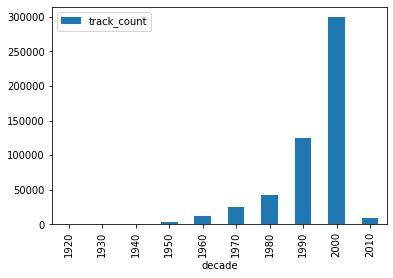

In [43]:
decade_track_metrics_df[decade_track_metrics_df.decade>0].plot(kind='bar', x='decade', y='track_count')

looks like it is growing.

In [15]:
%%sql genre_track_metrics <<

-- some song metrics grouped by genre
SELECT
       genre
     , count(*) as track_count
     , avg(duration) as average_duration
     , avg(loudness) as average_loudness
     , avg(tempo) as average_tempo
FROM dim_tracks
GROUP BY genre;

 * postgres://postgres@localhost/msddatabase
11 rows affected.
Returning data to local variable genre_track_metrics


In [21]:
genre_track_metrics_df = genre_track_metrics.DataFrame()
genre_track_metrics_df

,genre,track_count,average_duration,average_loudness,average_tempo
0,classic pop and rock,23895,233.395161,-10.667476,122.009337
1,classical,1874,329.959587,-21.521004,106.949386
2,dance and electronica,4935,296.792939,-11.143464,120.997916
3,folk,13192,232.970196,-13.002976,122.373236
4,hip-hop,434,211.086570,-7.957399,123.513647
5,jazz and blues,4334,345.286831,-15.461960,116.100063
6,metal,2103,267.129821,-6.417790,135.171199
7,pop,1617,231.966764,-8.325231,120.607210
8,punk,3200,189.702315,-7.833063,140.222858
9,soul and reggae,4016,248.261987,-9.749342,123.884413


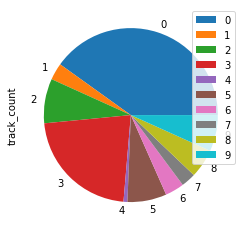

In [35]:
genre_track_metrics_df[genre_track_metrics_df.genre.notnull()].plot.pie(x='genre',y='track_count')

There are lots of classic pop and rock songs.

In [37]:
%%sql location_track_metrics <<

-- we have track data and artist location. 
-- Let s join and use them together to find top 10 locations 

SELECT
da.artist_location
,count(*) as track_count
,avg(artist_familiarity) as average_familiarity
,avg(artist_hotttnesss) as average_hotttness
FROM dim_tracks dt
INNER JOIN dim_artists da
    on dt.artist_id = da.artist_id
WHERE artist_location IS NOT NULL
group by da.artist_location
order by count(*) DESC
LIMIT 10;

 * postgres://postgres@localhost/msddatabase
10 rows affected.
Returning data to local variable location_track_metrics


Apparently, USA dominates the list.

In [38]:
location_track_metrics_df = location_track_metrics.DataFrame()
location_track_metrics_df

,artist_location,track_count,average_familiarity,average_hotttness
0,"New York, NY",9934,0.586066,0.399133
1,"London, England",9248,0.632220,0.435872
2,"Los Angeles, CA",8064,0.615478,0.432570
3,California - LA,7566,0.535725,0.353925
4,NY - New York City,7382,0.527035,0.348591
5,"Chicago, IL",6493,0.588671,0.407407
6,California,4719,0.558708,0.372704
7,Texas,4314,0.518483,0.340027
8,"Detroit, MI",4259,0.573249,0.383915
9,"Philadelphia, PA",4050,0.565915,0.388201


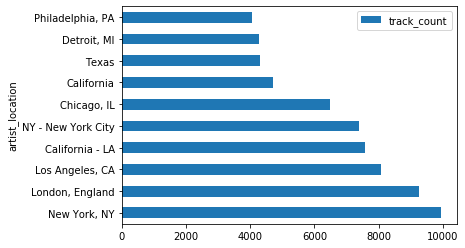

In [39]:
location_track_metrics_df.plot.barh(x='artist_location', y='track_count')

From now on we are going to write some specific queries based on our taste

In [44]:
%%sql

-- we love 80s and 90s brit music. Lets view hottest artists of it:
    
SELECT
da.artist_name
,count(*) as track_count
,avg(artist_familiarity) as average_familiarity
,avg(artist_hotttnesss) as average_hotttness
FROM dim_tracks dt
INNER JOIN dim_artists da
    on dt.artist_id = da.artist_id
WHERE (
    artist_location LIKE 'UK'
    OR artist_location LIKE '%England%'
    OR artist_location LIKE '%London%'
    OR artist_location LIKE '%UK%'
)
AND year between 1980 and 2000
group by da.artist_name
order by avg(artist_hotttnesss) DESC
LIMIT 10;

 * postgres://postgres@localhost/msddatabase
10 rows affected.


artist_name,track_count,average_familiarity,average_hotttness
Michael Jackson,91,0.8636704636638903,0.826207231714978
The Rolling Stones,38,0.8290918274552631,0.7474929467632107
Rod Stewart featuring Dolly Parton,2,0.795658307546,0.672644420276
The Clash,46,0.779469909327674,0.6031488305004565
The Pogues,21,0.7777016150560001,0.5868967149360002
The Cure,127,0.8103451347660393,0.585755690565228
Crowded House,19,0.716403119292,0.5828670624440001
P J Harvey,74,0.8171071250439187,0.5816139740925677
David Bowie,39,0.8643728118890257,0.5814580212457693
Robbie Williams,29,0.8497668823434827,0.5772380725865518


In [45]:
%%sql

-- best acid rock songs and artists

SELECT
       artist_name
     ,title,release
     ,year
     ,artist_familiarity
     ,artist_hotttnesss
     ,artist_location
from dim_tracks dt
INNER JOIN dim_artists da on dt.artist_id = da.artist_id
WHERE upper(da.mbtags) LIKE '%ACID ROCK%'
ORDER BY dt.artist_familiarity DESC
LIMIT 10;

 * postgres://postgres@localhost/msddatabase
10 rows affected.


artist_name,title,release,year,artist_familiarity,artist_hotttnesss,artist_location
The Doors,Who Do You Love [Live At The Matrix],Live At The Matrix,0,0.876829927182,0.584116573124,"Los Angeles, California, United States"
The Doors,The Unknown Soldier ( LP Version ),Waiting For The Sun,1968,0.876829927182,0.584116573124,"Los Angeles, California, United States"
The Doors,The Woman Is A Devil / Rock Me [Live At The Matrix],Live At The Matrix,0,0.876829927182,0.575027536335,"Los Angeles, California, United States"
The Doors,Five To One (Live in Pittsburgh_ May 2_ 1970),Live In Pittsburgh 1970,2008,0.876829927182,0.584116573124,"Los Angeles, California, United States"
The Doors,Crossroads (Live In Boston_ 1970) (1st Show),Live In Boston 1970,0,0.876829927182,0.575027536335,"Los Angeles, California, United States"
The Doors,Summertime (Light My Fire Continued) (Live In Boston_ 1970) (2nd Show),Live In Boston 1970,0,0.876829927182,0.584116573124,"Los Angeles, California, United States"
The Doors,Twentieth Century Fox [Live At The Matrix],Live At The Matrix,0,0.876829927182,0.575027536335,"Los Angeles, California, United States"
The Doors,Rock Me (Live In Boston_ 1970) (1st Show),Live In Boston 1970,0,0.876829927182,0.584116573124,"Los Angeles, California, United States"
The Doors,Push Push (Live in Pittsburgh_ May 2_ 1970),Live In Pittsburgh 1970,2008,0.876829927182,0.575027536335,"Los Angeles, California, United States"
The Doors,Back Door Man (Live In Boston_ 1970) (1st Show),Live In Boston 1970,0,0.876829927182,0.584116573124,"Los Angeles, California, United States"


In [46]:
%%sql

-- songs about Istanbul

select t.title,da.artist_name,da.artist_location,t.year from dim_tracks t
INNER JOIN dim_artists da on t.artist_id = da.artist_id
where upper(t.title) LIKE '%ISTANBUL%'
ORDER BY t.year DESC
LIMIT 10;

 * postgres://postgres@localhost/msddatabase
10 rows affected.


title,artist_name,artist_location,year
Istanbul,Tom Tykwer_ Johnny Klimek_ Reinhold Heil,None,2009
Istanbul,Paul Webster,None,2009
Istanbul,Paul Webster,None,2009
Striptease In Istanbul,Wax Poetic,None,2008
Istanbul,The Breeders,Boston,2008
Istanbul Lighthouse,Wax Poetic,None,2007
Istanbul Agliyor,Tarkan,None,2007
Istanbul Can Be Dub,Wax Poetic,None,2007
Sensiz istanbul'a düsmanim,Gripin,None,2007
Istanbul (Not Constantinople),Ska Cubano,None,2006


In [48]:
%%sql

-- similarity doubles grouped by location

SELECT da.artist_location as target_location
,da2.artist_location as similar_location
,count(*) as artist_count
FROM dim_artist_similarities ds
INNER JOIN dim_artists da on ds.similar_artist_id = da.artist_id
INNER JOIN dim_artists da2 on ds.target_artist_id = da2.artist_id
WHERE
da.artist_location IS NOT NULL
AND da2.artist_location IS NOT NULL
AND da.artist_location!=da2.artist_location
GROUP BY da.artist_location,da2.artist_location
ORDER BY count(*) DESC
LIMIT 10;

 * postgres://postgres@localhost/msddatabase
10 rows affected.


target_location,similar_location,artist_count
"Los Angeles, CA","New York, NY",327
"New York, NY",NY - New York City,298
"New York, NY","Los Angeles, CA",270
"Kingston, Jamaica",Jamaica,238
"Chicago, IL","New York, NY",233
"Los Angeles, CA","Chicago, IL",210
"New York, NY","Chicago, IL",208
"Los Angeles, CA",California - LA,207
"New York, NY",California - LA,193
"London, England","New York, NY",192


In [49]:
%%sql

-- total duration of Boris Vian

select
sum(duration) total_duration_of_boris_vian
from dim_artists a, dim_tracks t
where upper(a.artist_name) like '%BORIS VIAN%'
and  a.artist_id = t.artist_id

 * postgres://postgres@localhost/msddatabase
1 rows affected.


total_duration_of_boris_vian
10228.666720000001


In [50]:
%%sql

-- MYSTIC song composers

select l.artist_name,artist_location,count(*) as track_count
from dim_artists l
inner join dim_tracks dt on l.artist_id = dt.artist_id
where upper(l.terms) like '%MYSTIC%'
group by l.artist_name,artist_location
order by count(*) desc
LIMIT 10;

 * postgres://postgres@localhost/msddatabase
9 rows affected.


artist_name,artist_location,track_count
Bruno Sanfilippo,Buenos Aires,49
Agression,"Oxnard, CA",39
Kuba,Latvia,35
Psychic Ills,"New York, NY",22
Harold Budd And Brian Eno,Great Britain / UK,21
Max Corbacho,Spain,13
Shoshannah,United States,12
Byron Metcalf,"Prescott, AZ",11
David Ryan Harris,California - LA,1


In [52]:
%%sql

-- song count amorphis and similar to amorphis by year

select year, count(*) track_count
from dim_tracks
where artist_id in
(
select s.similar_artist_id
from dim_artists a
inner join dim_artist_similarities s on s.target_artist_id = a.artist_id
where a.artist_name = 'Amorphis'
union
select a.artist_id
from dim_artists a
where a.artist_name = 'Amorphis'
)
group by year
ORDER BY year DESC
LIMIT 10;

 * postgres://postgres@localhost/msddatabase
10 rows affected.


year,track_count
2010,69
2009,135
2008,153
2007,157
2006,223
2005,145
2004,194
2003,183
2002,140
2001,174


In [53]:
%%sql

--top 10 songs in uk

select title,release,year,artist_hotttnesss
from dim_tracks
where artist_id in
(
select artist_id from dim_artists
where artist_latitude between 50.5 and 58.5
and artist_longitude between -5.8 and 1.3
)
order by artist_hotttnesss desc
limit 10;

 * postgres://postgres@localhost/msddatabase
10 rows affected.


title,release,year,artist_hotttnesss
Maybe Tomorrow,Gold,1986,0.911299157453
All The Things You Are,Anthology: The Best Of Michael Jackson,1973,0.911299157453
Scream,HIStory - PAST_ PRESENT AND FUTURE - Book I,2008,0.911299157453
Stagger Lee,Godfather Of Soul,0,0.911299157453
This Is It,Michael Jackson's This Is It,2009,0.911299157453
You've Really Got A Hold On Me,Hello World - The Motown Solo Collection,1984,0.911299157453
2 Bad,BLOOD ON THE DANCE FLOOR/ HIStory In The Mix,1995,0.899991594263
Bad,Michael Jackson: The Ultimate Collection,1987,0.899991594263
Smooth Criminal (Radio Edit),Michael Jackson: The Ultimate Collection,2008,0.899991594263
You're The Only One,Soulsation! The 25th Anniversary Collection,0,0.899991594263


In [55]:
%%sql

--top slow songs between 1960 and 1980

select artist_name, title, year, artist_hotttnesss, rownr
from
(
select a.artist_name, s.title, s.year, s.artist_hotttnesss,
row_number() over(
    partition by s.year
    order by s.artist_hotttnesss desc) rownr
from dim_tracks s
inner join dim_artists a on a.artist_id = s.artist_id
where s.year <= 1980 and s.year >= 1960 and s.tempo < 100
) x where rownr = 1
order by year;

 * postgres://postgres@localhost/msddatabase
21 rows affected.


artist_name,title,year,artist_hotttnesss,rownr
Sam Cooke,Summertime,1960,0.568430226383,1
Ben E. King,This Magic Moment,1961,0.484178405858,1
Mahalia Jackson,Sweet little Jesus boy,1962,0.58898661628,1
Sam Cooke,(I Love You) For Sentimental Reasons,1963,0.568430226383,1
Sam Cooke,Tennessee Waltz,1964,0.568430226383,1
The Supremes,You Send Me,1965,0.514958267094,1
Wilson Pickett,Land Of 1000 Dances,1966,0.526894287038,1
Sam Cooke,Sad Mood,1967,0.568430226383,1
Mahalia Jackson,No Room At The Inn,1968,0.58898661628,1
Al Green,What Am I Gonna Do With Myself?,1969,0.599210493315,1


In [56]:
%%sql

--random 10 hot songs year after 2000
with sng as
(
select a.artist_name, s.title, s.year, s.artist_hotttnesss,
row_number() over(
    order by s.artist_hotttnesss desc) rownr
from dim_tracks s
inner join dim_artists a on a.artist_id = s.artist_id
where s.year >= 2000 and s.artist_hotttnesss > 0.6
)
select * from sng
where rownr in
(
    SELECT (y.maxrownr * random())::int + 1 r_num
    FROM generate_series(1,10)
    cross join (select max(rownr) maxrownr from sng) y
    group by 1
)

 * postgres://postgres@localhost/msddatabase
10 rows affected.


artist_name,title,year,artist_hotttnesss,rownr
Trey Songz,Ooo (Album Version),2005,0.8863227203,491
Linkin Park,Bleed It Out (Album Version),2007,0.79114300239,1715
Train,Ramble On,2001,0.783677407954,2096
Natasha Bedingfield,I Think They're Thinking - Interlude,2007,0.769674279295,2512
Alicia Keys,Samsonite Man,2003,0.751146752452,3028
Evanescence,My Last Breath,2003,0.705757553231,3861
Kelly Clarkson,Addicted,2004,0.684478823309,4531
Third Day,The First Noel,2006,0.642042372557,6291
Modest Mouse,Satin In A Coffin,2004,0.613120164383,8652
Mutemath,Chaos (Album Version),2006,0.608603984729,9226
